# Correlations and Correlograms in R
## Introduction

Correlograms can capture complex information in one image. Here you see, in one figure:
* histogram
* scatter-plots
* correlations coefficients
* p-values 
* boxplots 


In [181]:
#![Correlogram](img/Nice_correlogram.png)

## 2.Correlations: an example with MRI and histology data

Let's import the packages needed for this tutorial

In [134]:
library(GGally)
library(ggplot2)
library(Hmisc)
library(corrplot)

Let's import some Data 

In [135]:
#import variables for correlation from excel file

Data<- read.csv('example_HD235.csv', dec = ".")
colnames(Data)[1]= 'Iron' #rename odd naming first column
head(Data)


Iron,ORS,QSM,R2star,Ferritin,Myelin
120.59,58.587,70.375,92.048,10.471,46.067
124.01,93.875,64.962,106.221,15.135,48.365
137.97,122.154,82.615,125.788,11.433,59.471
124.85,156.596,33.269,132.981,13.010,71.115
120.43,154.279,20.067,134.442,13.058,62.125
12.90,6.327,-28.394,114.337,2.962,83.058


In [130]:

#install.packages('expss')
#library(expss)
#apply_labels(Data,
                     # Iron = "Iron",
                     # Ferritin ='Histology',
                     # Myelin = 'Histology',
                     # ORS = 'MRI',
                     # QSM = 'MRI',
                     # R2star = 'MRI'
             
            # )

#label(Data)

Let's look at a summary of the data with a special syntax

In [136]:
Data %>% glimpse() 

Rows: 34
Columns: 6
$ Iron     <dbl> 120.59, 124.01, 137.97, 124.85, 120.43, 12.90, 25.26, 47.90, ~
$ ORS      <dbl> 58.587, 93.875, 122.154, 156.596, 154.279, 6.327, 13.529, 25.~
$ QSM      <dbl> 70.375, 64.962, 82.615, 33.269, 20.067, -28.394, -42.192, -49~
$ R2star   <dbl> 92.048, 106.221, 125.788, 132.981, 134.442, 114.337, 112.731,~
$ Ferritin <dbl> 10.471, 15.135, 11.433, 13.010, 13.058, 2.962, 5.327, 8.067, ~
$ Myelin   <dbl> 46.067, 48.365, 59.471, 71.115, 62.125, 83.058, 78.192, 76.96~


Let's quickly inspect the data


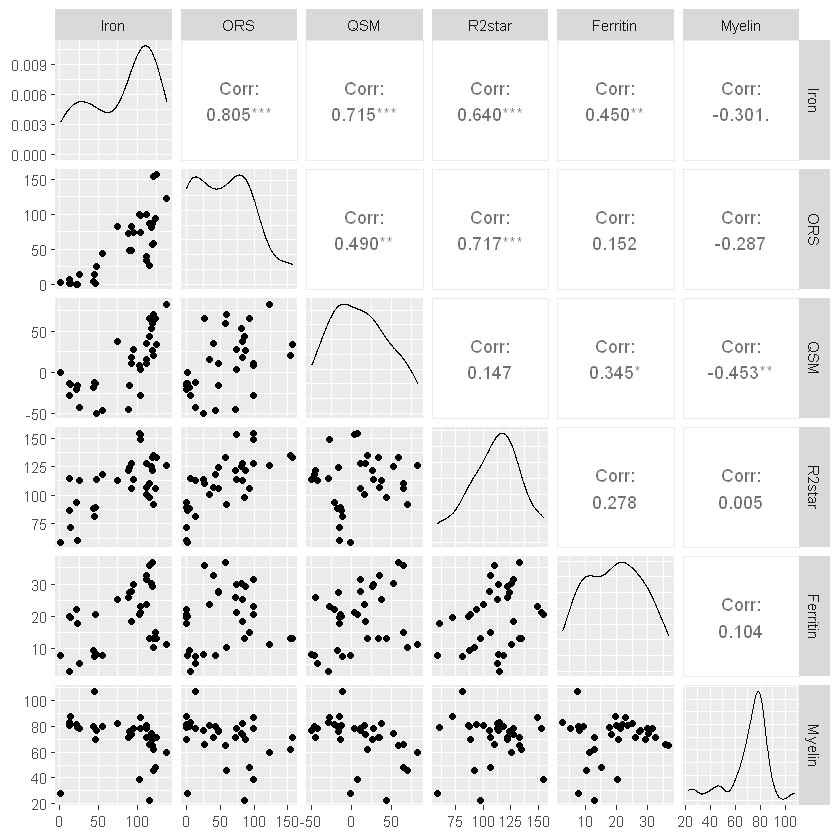

In [176]:
#ggpairs(Data, columns = 1:6,ggplot2::aes(colour=label(Data)))
group <- NA
group[colnames(Data)==('ORS')|(colnames(Data)==('QSM'))|colnames(Data)==('R2star')] <- 'MRI'
group[colnames(Data)==('Iron')|(colnames(Data)==('Myelin'))|colnames(Data)==('Ferritin')] <- 'Histology'
#head(Data)



ggpairs(Data, columns = 1:6)


In order to create a correlogram, we have to create a matrix with correlation coefficients and p-values

In [177]:
corr_matrix_pears=rcorr(as.matrix(Data), type = "pearson")
CP=round(corr_matrix_pears$r,2) #corr coeff values
PVP=round(corr_matrix_pears$P,3) #p-values


Let's plot the correlogram

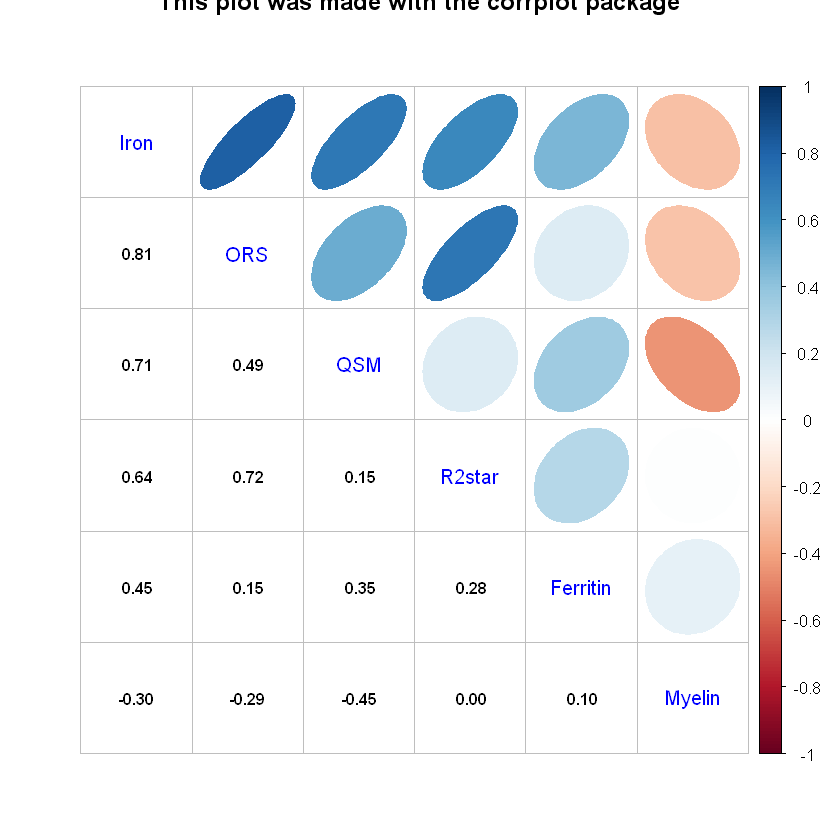

In [178]:
corrplot.mixed(CP,lower='number',upper='ellipse',
               lower.col = "black", number.cex = .8,
               tl.col = "blue",
              title ='This plot was made with the corrplot package')


Table of p-values

In [179]:
PVP

,Iron,ORS,QSM,R2star,Ferritin,Myelin
Iron,NA,0.000,0.000,0.000,0.008,0.084
ORS,0.000,NA,0.003,0.000,0.391,0.100
QSM,0.000,0.003,NA,0.405,0.045,0.007
R2star,0.000,0.000,0.405,NA,0.112,0.979
Ferritin,0.008,0.391,0.045,0.112,NA,0.558
Myelin,0.084,0.100,0.007,0.979,0.558,NA


# Print Dependences
Let's look at the packages and R version used in this example

In [180]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18363)

Matrix products: default

locale:
[1] LC_COLLATE=Dutch_Netherlands.1252  LC_CTYPE=Dutch_Netherlands.1252   
[3] LC_MONETARY=Dutch_Netherlands.1252 LC_NUMERIC=C                      
[5] LC_TIME=Dutch_Netherlands.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] expss_0.10.7    dplyr_1.0.6     corrplot_0.90   Hmisc_4.5-0    
[5] Formula_1.2-4   survival_3.2-11 lattice_0.20-38 GGally_2.1.2   
[9] ggplot2_3.3.5  

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1          png_0.1-7           assertthat_0.2.1   
 [4] digest_0.6.18       utf8_1.1.4          IRdisplay_0.7.0    
 [7] R6_2.4.0            plyr_1.8.4          repr_0.19.2        
[10] backports_1.1.4     evaluate_0.13       pillar_1.6.2       
[13] rlang_0.4.11        uuid_0.1-2          rstudioapi_0.10    
[16] data.tab